In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def Sens_curves(option_opsins):
    
    if option_opsins==0:
        ##### Raw opsin responses
        N_points = 13
        raw = np.loadtxt("Data/Opsins_raw.txt")
        idx = np.array(np.linspace(0,raw[0,:].size-1, N_points),dtype=int)
        return raw[-1,idx], raw[0,idx], raw[1,idx], raw[2,idx], raw[3,idx]
        
    if option_opsins==1:
        ##### Fitted opsin responses HC-blocked
        N_points = 30
        fit = np.loadtxt("Data/Opsins_fit.txt")
        idx = np.array(np.linspace(0,fit[0,:].size-1, N_points),dtype=int)
        return fit[-1,idx], fit[0,idx], fit[1,idx], fit[2,idx], fit[3,idx]
    
    if option_opsins==2:
        ##### Functional opsin curves
        Red_ops = np.loadtxt("Data/Functional_trace_OpsinR.txt")
        Green_ops = np.loadtxt("Data/Functional_trace_OpsinG.txt")
        Blue_ops = np.loadtxt("Data/Functional_trace_OpsinB.txt")
        UV_ops = np.loadtxt("Data/Functional_trace_OpsinU.txt")
        l_array = np.loadtxt("Data/Functional_trace_Opsin_wavelength.txt")
        
        Red_mean = np.mean(np.reshape(Red_ops[1,:], (int(Red_ops[1,:].size/13), 13)), axis=0)
        Green_mean = np.mean(np.reshape(Green_ops[1,:], (int(Green_ops[1,:].size/13), 13)), axis=0)
        Blue_mean = np.mean(np.reshape(Blue_ops[1,:], (int(Blue_ops[1,:].size/13), 13)), axis=0)
        UV_mean = np.mean(np.reshape(UV_ops[1,:], (int(UV_ops[1,:].size/13), 13)), axis=0)
    
        return np.flip(l_array), (Red_mean), (Green_mean), (Blue_mean), (UV_mean)
    

In [5]:
Combination = 0

option_opsins = 1 #0 if raw opsins, 1 if fitted opsins with HC-blocked, 2 if functional opsins.
LL, RR, GG, BB, UU = Sens_curves(option_opsins) # Red and Green combination
option_opsins = 2 #0 if raw opsins, 1 if fitted opsins with HC-blocked, 2 if functional opsins.
LL_, RR_, GG_, BB_, UU_ = Sens_curves(option_opsins) # Red and Green combination

(-1.1, 1.1)

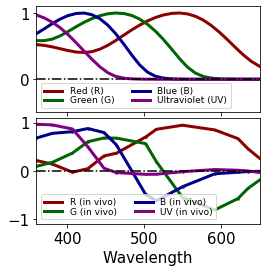

In [6]:
# fig=plt.figure(figsize=(20,7.0))
fig=plt.figure(figsize=(4,4))

grid2 = plt.GridSpec(2, 2, wspace=0.6, hspace=0.05)

p1=fig.add_subplot(grid2[0,:2])
p2=fig.add_subplot(grid2[1,:2])

# p2.set_yticklabels([])

p1.plot(LL,RR,color='darkred',marker='o',markerfacecolor='none',markersize='0',label='Red (R)',linewidth = 3)
p1.plot(LL,GG,color='darkgreen',marker='o',markerfacecolor='none',markersize='0',label='Green (G)',linewidth = 3)
p1.plot(LL,BB,color='darkblue',marker='o',markerfacecolor='none',markersize='0',label='Blue (B)',linewidth = 3)
p1.plot(LL,UU,color='purple',marker='o',markerfacecolor='none',markersize='0',label='Ultraviolet (UV)',linewidth = 3)

# p1.set_xlabel("Wavelength",fontsize=15)
# p1.set_ylabel("Sens. functions",fontsize=19)
p1.tick_params(labelsize=15)
p1.axhline(y=0,color='k',linestyle='-.')
p1.legend(fontsize=9,loc=3,handleheight=0.1, labelspacing=0.006, ncol=2)
# p1.set_ylim(0,1.1)
p1.set_ylim(-0.5, 1.1)
p1.set_xlim(360,650)

##### Plot opsins_HCblock + PCA + opsins_functional

p2.plot(LL_,RR_,color='darkred',linestyle='-',marker='.',markerfacecolor='none',markersize='3',label='R (in vivo)',linewidth = '3')
p2.plot(LL_,GG_,color='darkgreen',linestyle='-',marker='.',markerfacecolor='none',markersize='3',label='G (in vivo)',linewidth = '3')
p2.plot(LL_,BB_,color='darkblue',linestyle='-',marker='.',markerfacecolor='none',markersize='3',label='B (in vivo)',linewidth = '3')
p2.plot(LL_,UU_,color='purple',linestyle='-',marker='.',markerfacecolor='none',markersize='3',label='UV (in vivo)',linewidth = '3')


p2.axhline(y=0,color='k',linestyle='-.')
p2.set_xlabel("Wavelength",fontsize=15)
# p2.set_ylabel("Functional ops",fontsize=20)
p2.tick_params(labelsize=15)
p2.legend(fontsize=9,handleheight=0.1, labelspacing=0.006, ncol=2)
p2.set_xlim(360, 650)
p2.set_ylim(-1.1,1.1) 

# plt.savefig("Plots/SupFig_UV_network.pdf")

### Supplementary figure - response function

$F[h] = \tanh(h) + 1$

Text(0, 0.5, 'F[h]')

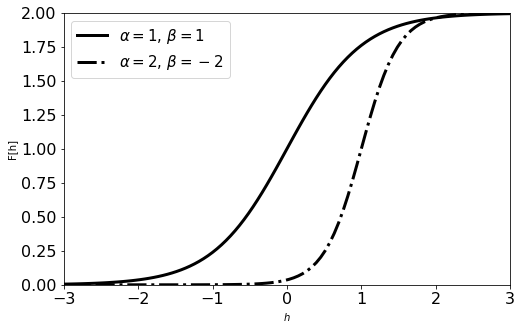

In [7]:
x = np.linspace(-3, 3, 100)
y1 = np.tanh(x) + 1
alpha = 2
beta = -2
y2 = np.tanh(alpha*x + beta) + 1

plt.figure(figsize = (8, 5))
plt.plot(x, y1, label = r"$\alpha = 1, \, \beta = 1$", color = 'k', linewidth = 3)
plt.plot(x, y2, label = r"$\alpha = 2, \, \beta = -2$", color = 'k', linestyle='-.', linewidth = 3)
plt.xlim(-3, 3)
plt.ylim(0, 2)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 16)
plt.xlabel(r"$h$")
plt.ylabel(r"F[h]")
# plt.savefig("Plots/Sup_ResponseFunction_modified.pdf",bbox_inches='tight', dpi=150)
